# Lowest Common Ancestor of a Binary Tree

Given a binary tree, find the lowest common ancestor (LCA) of two given nodes in the tree.

According to the definition of LCA on Wikipedia: “The lowest common ancestor is defined between two nodes p and q as the lowest node in T that has both p and q as descendants (where we allow a node to be a descendant of itself).”

 

Example 1:
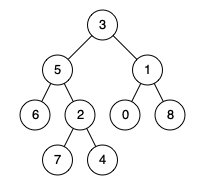

Input: root = [3,5,1,6,2,0,8,null,null,7,4], p = 5, q = 1
Output: 3
Explanation: The LCA of nodes 5 and 1 is 3.
Example 2:

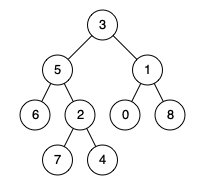
Input: root = [3,5,1,6,2,0,8,null,null,7,4], p = 5, q = 4
Output: 5
Explanation: The LCA of nodes 5 and 4 is 5, since a node can be a descendant of itself according to the LCA definition.
Example 3:

Input: root = [1,2], p = 1, q = 2
Output: 1

In [1]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, x):
#         self.val = x
#         self.left = None
#         self.right = None

class Solution:
    def lowestCommonAncestor(self, root, p, q):
        # mark parent of each nodes of the fraph
        def markParent(node,par=None):
            # if null return
            if not node:return
            # mark parent node
            node.par=par
            # do the same for chil nodes using dfs
            markParent(node.left,node)
            markParent(node.right,node)
        markParent(root)
        # create a dict to maintain ancesstors of each node
        visited={}
        # method to traverse using dfs and get ancestors for every node
        def dfs(node):
            # if null return
            if not node: return
            # add ancestors to the visited
            if node.par and node.val not in visited:
                visited[node.val]=visited[node.par.val].copy()
                visited[node.val].append(node)
            else:
                visited[node.val]=[node]  
            # do the same for child nodes    
            dfs(node.left)
            dfs(node.right)
        dfs(root) 
        # from the last level of q, the matching common ancestor at p will be LCA
        for i in range(len(visited[q.val])-1,-1,-1):
            if visited[q.val][i] in visited[p.val]:
                return visited[q.val][i]
        